# Introduction


In this homework, you'll be required to load in a dataset which has about 500 features. By using
Lasso ($L^1$) regression, we'll find the optimal constraint on the $L^1$ norm which gives us the best
$R^2$. Then we'll plot the results.

Recall we minimize the following on ** training data: $(x_i,y_i)$**

$$\min_{\beta} \frac{1}{N} \sum_{i=1}^N (y_i - \beta \cdot x_i)^2 + \lambda \|\beta \|_{L^1}.$$


Denoting $\beta_{\lambda}$ as the minimum of the above, we then choose $\lambda$ to maximize $R^2$ on **testing data: $(x_j,y_j)$**

$$ \max_{\lambda} 1 - \frac{\sum_{j} (y_j - \beta_{\lambda} \cdot x_j)^2}{\sum_j (y_j - \bar y)^2}$$


# Lasso Regularization

## Problem 1

a) Load in hw2data.csv from ../data into a pandas dataframe.

In [66]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

data = pd.read_csv('hw2data.csv', index_col=0)

b) Set y to be the y variable in the dataframe from a and X to be the remaining features.

In [67]:
y = data['y']
X = data.drop(['y'], axis=1)

#normalize data
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)

/Users/kathyli/anaconda/envs/py27/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/kathyli/anaconda/envs/py27/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


c) As shown in the Booking.com example, using Lasso regression, find the regularization strength
which optimizes the $R^2$. 

**Hint:** Take a range of alpha from `np.logspace(-8,-3,1000)`

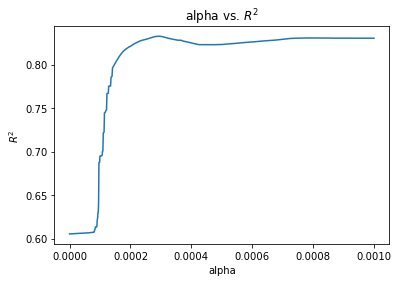

In [68]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#set a range of alphas
alphas = np.logspace(-8,-3,1000)
scores = []

#split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=7)

#iterate through alpha values and compute R^2, then plot; pick optimal alpha
for alpha in alphas:
    regr = Lasso(alpha=alpha)
    
    #train the model using training data and record the score
    regr.fit(X_train, y_train)
    
    #record score
    scores.append(regr.score(X_test, y_test))

#plot alphas vs. scores
plt.plot(alphas, scores)
plt.xlabel('alpha')
plt.ylabel('$R^2$')
plt.title('alpha vs. $R^2$')
plt.show()

In [23]:
alpha_best = alphas[scores.index(max(scores))]
alpha_best

0.00029476062551248586

d) Plot the training perforamnce versus the testing performance, and observe whree the test performance is
maximized. I've written an outline of the code you need.

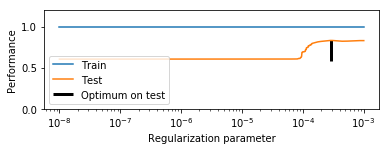

In [69]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.subplot(2, 1, 1)

# Fill these in
train_errors=[]
test_errors=[]
alpha_optim=alpha_best

#compute scores: train_errors, test_errors
for alpha in alphas:
    regr = Lasso(alpha=alpha)
    
    #train the model using training data and record the score
    regr.fit(X_train, y_train)
    
    #compute score on train and test data
    train_errors.append(regr.score(X_train, y_train))
    test_errors.append(regr.score(X_test, y_test))

#plot alphas vs. errors
plt.semilogx(alphas, train_errors, label='Train')
plt.semilogx(alphas, test_errors, label='Test')
plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k', linewidth=3, label='Optimum on test')
plt.legend(loc='lower left')
plt.ylim([0, 1.2])
plt.xlabel('Regularization parameter')
plt.ylabel('Performance')

plt.show()

We observe that the optimum is achieved where performance is maximized on the testing data. As expected, we have perfect performance on the training set (since this is what we use to fit the model), and we have variable performance on the testing set, depending on the $\alpha$ value we choose.

e) Plot the top coefficients based on this optimal paramter. Why do you think so many are zero? 

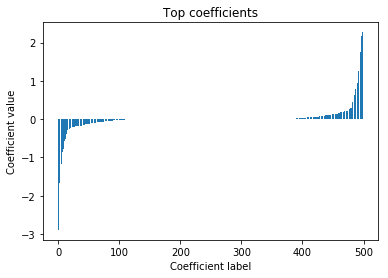

In [70]:
#compute coefficients
regr = Lasso(alpha=alpha_best)
regr.fit(X_train,y_train)
coeffs = np.array(regr.coef_)

#sort and plot coefficients
coeffs = np.sort(coeffs)
plt.bar(range(499), coeffs)
plt.xlabel('Coefficient label')
plt.ylabel('Coefficient value')
plt.title('Top coefficients')

We see that many of the coefficients are zero - the reason for this may be the fact that we are using an $L^1$ penalty, and if we recall drawing the contour of the constaint function of the $L^1$ norm versus, for instance, the $L^2$ norm (like we would use if we were doing a ridge regression), the $L^1$ contours are diamonds, whereas the $L^2$ contours are circles; thus, if we imagine the contours of the least squares error, and we think about these contours intersecting with the contour of the constraint function, we see that when using the $L^1$ norm, more coefficients are sent to zero (due to how the contours intersect when we find an optimal penalty), versus with the $L^2$ norm, the effect is spread onto the coefficients more evenly. That is, since the penalty for small coefficients for the $L^1$ norm is greater (i.e., less small coefficients are allowed), we can see that $L^2$ is a "smoother" norm; this is why sometimes we use the $L^1$ norm when trying to do variable selection, since it zeroes out more coefficients.

f) Compute the $R^2$ with the optimal coefficient found above on 5 folds using cross_val_score and plot the
results. Does the model work well on all random subsets?

Scores are: [ 0.9034165   0.78698075  0.89660606  0.87329328  0.85231736]


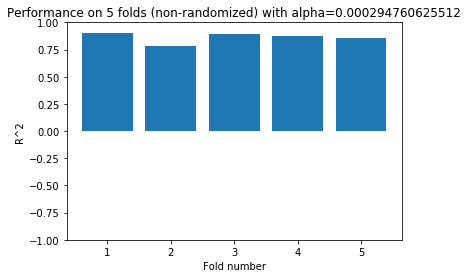

Scores are: [ 0.88792773  0.90789918  0.85355425  0.85066339  0.8970334 ]


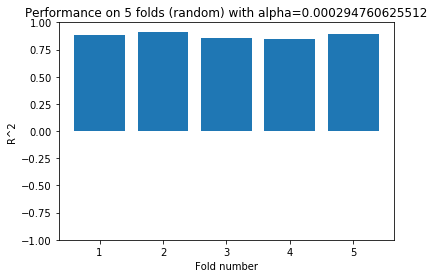

In [71]:
from sklearn.model_selection import ShuffleSplit

#compute R^2 for 5 folds using cross-validation
from sklearn.model_selection import cross_val_score
regr = Lasso(alpha=alpha_best)
regr.fit(X_train,y_train)

#non-randomized
scores = cross_val_score(regr, X_scaled, y, cv=5)

print("Scores are: "+ str(scores))

#plot result
plt.ylim([-1,1])
plt.xlabel('Fold number')
plt.ylabel('R^2')
plt.title('Performance on 5 folds (non-randomized) with alpha=' + str(alpha_best))
plt.bar(range(1,6),scores)
plt.show()

#random subsets
cv = ShuffleSplit(n_splits=5, test_size=0.2)
scores = cross_val_score(regr, X_scaled, y, cv=cv)

print("Scores are: "+ str(scores))

#plot result
plt.ylim([-1,1])
plt.xlabel('Fold number')
plt.ylabel('R^2')
plt.title('Performance on 5 folds (random) with alpha=' + str(alpha_best))
plt.bar(range(1,6),scores)
plt.show()

We see that our model does work well on all subsets (random and not random)- our $R^2$ is above ~0.8 for each fold.

f) Repeat e) but using cross validation. Use error bars on the features which are the standard deviation of the 
coefficiens obtained above. For this problem I"ll walk you through the code. You just need to apply your optimal
$\alpha$ found above. 

In [72]:
from sklearn.cross_validation import KFold

def run_cv_coeffs(X,y,clf_class,alpha):
    # Construct a kfolds object
    kf = KFold(len(y),n_folds=5,shuffle=True)
    y_pred = y.copy()
    coeffs=[]
    # Iterate through folds
    for train_index, test_index in kf:
        
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        
        # Initialize a classifier with alpha
        clf = clf_class(alpha)
        clf.fit(X_train,y_train)
        
        y_pred[test_index] = clf.predict(X_test)
        coeffs.append(clf.coef_)
    return coeffs

coeffs=run_cv_coeffs(X_scaled,np.array(y),Lasso,alpha=alpha_best)

In [73]:
def get_coeffs(coeffs):
    coeffs_avgd = [(coeffs[0][i] + coeffs[1][i] + coeffs[2][i] + coeffs[3][i] + coeffs[4][i])/5 for i in range(0,len(X.columns))]
    coeffs_std = [np.std([coeffs[0][i],coeffs[1][i],coeffs[2][i],coeffs[3][i],coeffs[4][i]]) for i in range(0,len(X.columns))]
    return coeffs_avgd, coeffs_std

coeffs_avg,coeffs_std=get_coeffs(coeffs)

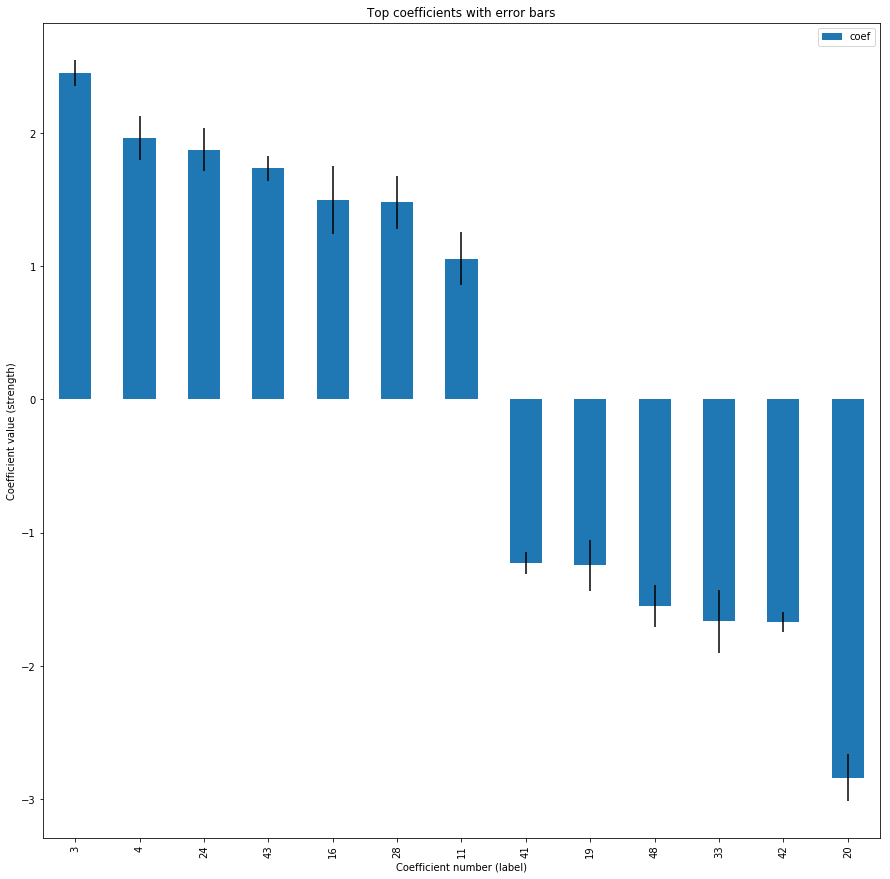

In [74]:
dfCoeffs = pd.DataFrame({'type':X.columns.values, 'coef':coeffs_avg, 'std':coeffs_std})
dfCoeffs = dfCoeffs[(dfCoeffs['coef']>1) |(dfCoeffs['coef']<-1) ]
plt.figure(figsize=(15,15))
dfCoeffs_sorted = dfCoeffs.sort_values(['coef'])[::-1]
yerr_vals = dfCoeffs_sorted['std'].values
dfCoeffs_sorted.plot(x='type',y='coef',kind='bar',yerr=yerr_vals,figsize=(15,15))
plt.title('Top coefficients with error bars')
plt.xlabel('Coefficient number (label)')
plt.ylabel('Coefficient value (strength)')